<a href="https://colab.research.google.com/github/a-forty-two/EY_batch6_2ndSep24/blob/main/Sep24_002_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's continue from where we last left. In this lab, we will be cleaning our data to see how our models improve.

Let's quickly get our data, and repeat the steps we performed in the last lab.

In [78]:
# read the data
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [81]:
# look at the data
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [82]:
# let's work with fewer columns for simplicity
data = data.iloc[:,:11]
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')

<Axes: >

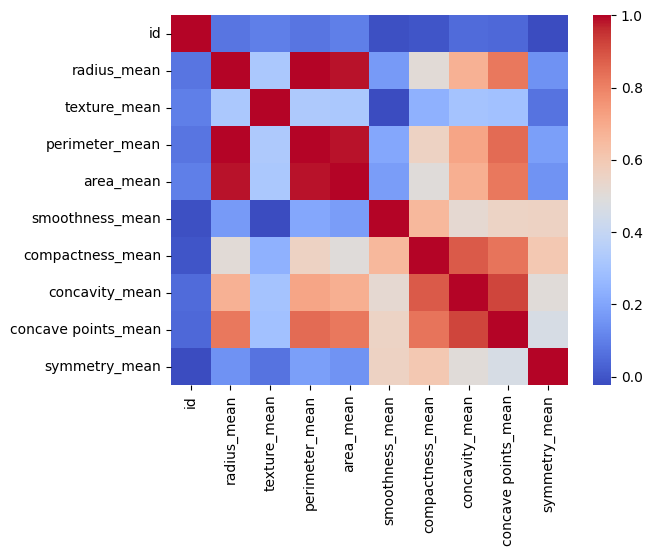

In [83]:
import seaborn as sns
inp_cols = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean']
cr = data[inp_cols].corr()
sns.heatmap(cr, cmap='coolwarm')

<Axes: >

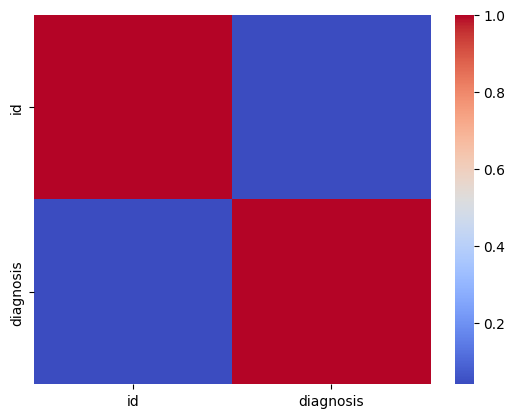

In [84]:
import copy
y = copy.copy(data)

y["diagnosis"] = y['diagnosis'].map(lambda val: 1 if val=='M' else 0)
y = y.loc[: , ['id','diagnosis']]

cr = y.corr()

sns.heatmap(cr, cmap='coolwarm')

In [85]:
# set the index
data = data.set_index('id')

In [86]:
data.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350


This dataset doesn't have any null values, but let's go through the check and steps anyway.

In [87]:
data.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [88]:
#drop null values if any
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            569 non-null    object 
 1   radius_mean          569 non-null    float64
 2   texture_mean         569 non-null    float64
 3   perimeter_mean       569 non-null    float64
 4   area_mean            569 non-null    float64
 5   smoothness_mean      569 non-null    float64
 6   compactness_mean     569 non-null    float64
 7   concavity_mean       569 non-null    float64
 8   concave points_mean  569 non-null    float64
 9   symmetry_mean        569 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.9+ KB


Get the label and features out

In [89]:
data.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350


In [90]:
y = data['diagnosis'].map(lambda val: 1 if val=='M' else 0)

In [91]:
y.head(20)

,diagnosis
id,
842302,1
842517,1
84300903,1
84348301,1
84358402,1
843786,1
844359,1
84458202,1
844981,1


In [92]:
x = data.iloc[:, 1:]

In [93]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')

In [94]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
id,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


Let's also get the train-test divide done

In [95]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                      random_state=42,
                                      test_size=0.2)

From the last exercise, we remember that 'diagnosis' was our label column. There were two types of results: 'M' and 'B'.

Now that we have labels and features separately, it's easier to cleanse our data. Let's begin with normalizing our data. Normalization offers a uniform scale across the dataset.

One of the ways to normalize the data is Z-Scoring. The formulae is:


normalized data = (data-mean)/standard_deviation

We can get the statistics from the dataset:

In [96]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.117635,3.535815,7.69100,11.705000,13.30000,15.740000,28.1100
texture_mean,455.0,19.185033,4.266005,9.71000,16.170000,18.68000,21.585000,39.2800
perimeter_mean,455.0,91.882242,24.322027,47.92000,75.100000,85.98000,103.750000,188.5000
area_mean,455.0,654.377582,354.943187,170.40000,420.300000,551.70000,767.600000,2501.0000
smoothness_mean,455.0,0.095744,0.013923,0.05263,0.085825,0.09462,0.104550,0.1634
compactness_mean,455.0,0.103619,0.052470,0.01938,0.062890,0.09097,0.131300,0.3114
concavity_mean,455.0,0.088898,0.079468,0.00000,0.029320,0.06154,0.132350,0.4268
concave points_mean,455.0,0.048280,0.038060,0.00000,0.020340,0.03341,0.073895,0.2012
symmetry_mean,455.0,0.181099,0.027487,0.11670,0.161850,0.17920,0.195800,0.3040


Question- why did we transpose the statistics?

In [97]:
mu = stats['mean']
sigma = stats['std']
norm_xtrain = (xtrain-mu)/sigma

In [98]:
norm_xtest = (xtest-mu)/sigma

Observe how we calculate mu (mean) and sigma (standard deviation) from only training data, and then applied the same rules to testing data.

One advantage of Z-Scoring method (besides being able to normalize) is outlier detection. Let's first use the box plot to visualize any outliers.

Outliers would be the values greater than 3, and less than -3.

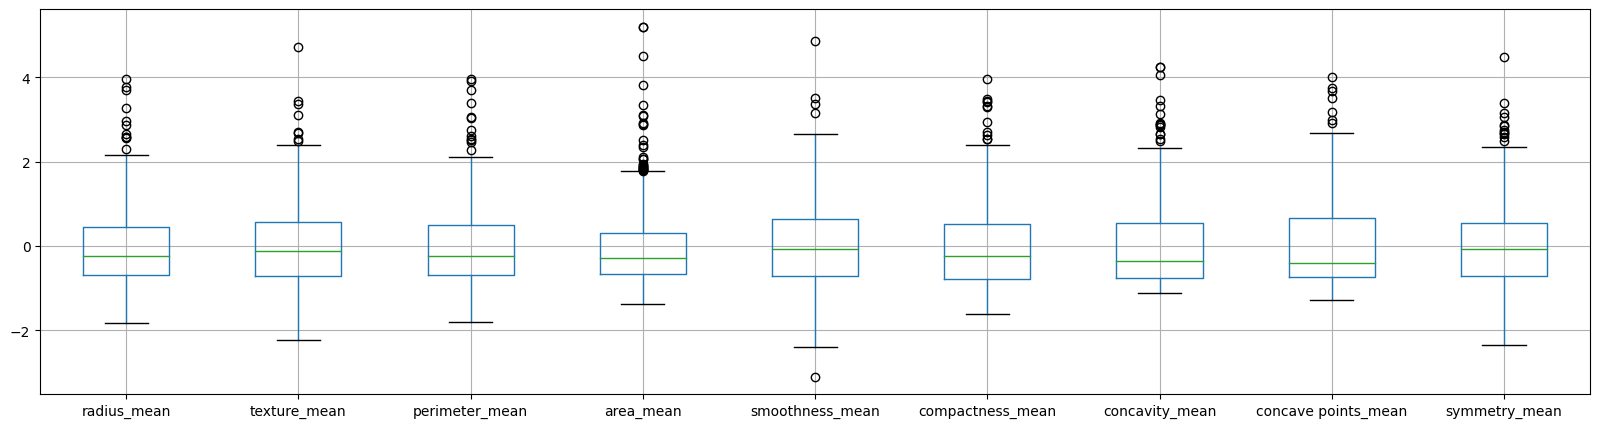

In [99]:
plt.figure(figsize=(20,5))
norm_xtrain.boxplot(fontsize=10)
plt.show()

Question- Are there any outliers?

Now, let's deal with the outliers. There are two solutions to managing them:



1.   Replace them- with mean, median, mode or a custom value
2.   Remove them- either row wise or column wise



Let's have a look at the outliers.

In [100]:
# total outliers in every column
(norm_xtrain>3).sum() + (norm_xtrain<-3).sum()

,0
radius_mean,4
texture_mean,4
perimeter_mean,6
area_mean,7
smoothness_mean,5
compactness_mean,6
concavity_mean,6
concave points_mean,5
symmetry_mean,4


In [101]:
#let's have a look at what outliers looks like
norm_xtrain[(norm_xtrain['smoothness_mean']>3) |
            (norm_xtrain['smoothness_mean']<-3)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
id,,,,,,,,,
92751,-1.798068,1.255265,-1.807507,-1.333671,-3.096603,-1.143487,-1.118668,-1.268513,-0.814874
84348301,-0.762946,0.280114,-0.588037,-0.755832,3.358181,3.435849,1.919038,1.495529,2.859550
865423,2.865638,0.237920,3.055574,3.117745,3.516193,3.489212,4.252055,4.017849,3.070556
863030,-0.284980,-0.849749,-0.192099,-0.349852,3.164258,1.388984,1.487417,1.254069,0.414785
915186,-1.371575,-1.480316,-1.249577,-1.142937,4.859294,2.292349,0.105726,0.111406,2.062818


Now that we have seen some outliers, let's remove them.

In [102]:
idx_to_remove = []
for col in norm_xtrain.columns:
  idx = norm_xtrain[(norm_xtrain[col]>3) |
            (norm_xtrain[col]<-3)].index
  idx_to_remove.extend(idx)
print("These ids are outliers: ",idx_to_remove)


These ids are outliers:  [873592, 899987, 8810703, 911296202, 88330202, 88119002, 88203002, 88725602, 873592, 899987, 91762702, 865423, 8810703, 911296202, 873592, 899987, 91762702, 865423, 8810703, 911296202, 89812, 92751, 84348301, 865423, 863030, 915186, 873593, 842302, 86355, 84348301, 865423, 887181, 86355, 8710441, 899987, 865423, 878796, 911296202, 86355, 873592, 899987, 865423, 911296202, 858970, 852631, 869691, 865423]


In [103]:
len(idx_to_remove)

47

In [104]:
len(norm_xtrain), len(ytrain)

(455, 455)

In [105]:
#dir(pd)

In [ ]:
# OPTIONAL-> uncomment below two blocks if you want to remove the outliers
# if you want to keep the outliers, let this be commented

#norm_xtrain.drop(index=idx_to_remove, inplace=True)
#ytrain.drop(index=idx_to_remove, inplace=True)

In [ ]:
len(norm_xtrain), len(ytrain)

(431, 431)

In [106]:
ytrain[:20]

,diagnosis
id,
859471,0
873593,1
859196,0
88466802,0
858970,0
84799002,1
89143602,0
868682,0
8711003,0


Now let's perform some machine learning to see if anything changes.

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [126]:
# HPs -> factors that change the model outcome during training or inference
all_algos = {
    "logisitc regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vectors with Linear Kernel": SVC(kernel='linear'),
    "Support Vectors with RBF kernel": SVC(kernel='rbf'),
    "Linear Support Vectors": LinearSVC(),
    "Decision Tree50": DecisionTreeClassifier(max_depth=50),
    "Decision Tree75": DecisionTreeClassifier(max_depth=75),
    "Decision Tree25": DecisionTreeClassifier(max_depth=25),
    "Decision Tree125": DecisionTreeClassifier(max_depth=125),
    "Decision Tree250": DecisionTreeClassifier(max_depth=250),
    "Neighbors": KNeighborsClassifier(),
    "Random Forest100": RandomForestClassifier(),
    "Random Forest50": RandomForestClassifier(n_estimators=50),
    "Random Forest500": RandomForestClassifier(n_estimators=500),
    "Random Forest250": RandomForestClassifier(n_estimators=250)
}

In [127]:
from sklearn.metrics import f1_score
all_acc = []
all_f1_score = []
best_acc = 0.0
best_f1_score = 0.0
best_model_by_acc = ""
best_model_by_f1 = ""
for algoname, algo in all_algos.items():
  print('*********')
  print('Beginning to train ', algoname, ' model')
  algo.fit(norm_xtrain,ytrain)
  predictions = algo.predict(norm_xtest)
  acc_score = algo.score(norm_xtest, ytest)
  f1 = f1_score(predictions, ytest, average='binary')
  all_acc.append(acc_score)
  all_f1_score.append(f1)
  print('Model Acc Score = ', acc_score*100,'%', end=" ")
  print(', Model F1 Score = ', f1)
  if acc_score > best_acc:
    best_acc = acc_score
    best_model_by_acc = algoname
  if f1 > best_f1_score:
    best_f1_score = f1
    best_model_by_f1 = algoname


*********
Beginning to train  logisitc regression  model
Model Acc Score =  93.85964912280701 % , Model F1 Score =  0.9176470588235294
*********
Beginning to train  Naive Bayes  model
Model Acc Score =  93.85964912280701 % , Model F1 Score =  0.9156626506024096
*********
Beginning to train  Support Vectors with Linear Kernel  model
Model Acc Score =  92.98245614035088 % , Model F1 Score =  0.9069767441860465
*********
Beginning to train  Support Vectors with RBF kernel  model
Model Acc Score =  97.36842105263158 % , Model F1 Score =  0.963855421686747
*********
Beginning to train  Linear Support Vectors  model
Model Acc Score =  93.85964912280701 % , Model F1 Score =  0.9195402298850575
*********
Beginning to train  Decision Tree50  model
Model Acc Score =  92.10526315789474 % , Model F1 Score =  0.891566265060241
*********
Beginning to train  Decision Tree75  model
Model Acc Score =  92.10526315789474 % , Model F1 Score =  0.896551724137931
*********
Beginning to train  Decision Tree2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Acc Score =  94.73684210526315 % , Model F1 Score =  0.9302325581395349
*********
Beginning to train  Random Forest50  model
Model Acc Score =  95.6140350877193 % , Model F1 Score =  0.9411764705882352
*********
Beginning to train  Random Forest500  model
Model Acc Score =  94.73684210526315 % , Model F1 Score =  0.9302325581395349
*********
Beginning to train  Random Forest250  model
Model Acc Score =  94.73684210526315 % , Model F1 Score =  0.9302325581395349


In [128]:
best_model_by_acc

'Support Vectors with RBF kernel'

In [129]:
best_acc

0.9736842105263158

Some of the models should have shown tiny improvements now.

In [112]:
best_model_by_f1

'Neighbors'

In [113]:
best_f1_score

0.942528735632184

Observation- compare results with your peers. Are your results similar? What does this tell you about machine learning behaviour?